In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sesión 1: Clasificación de PDE's

* Hiperbólicas
* Parabólicas
* Elípticas

$$A\frac{\partial\phi ^2}{\partial x^2} + B\frac{\partial\phi ^2}{\partial x \partial y} + C \frac{\partial\phi ^2}{\partial y^2} + D \frac{\partial\phi}{\partial x} + E\frac{\partial\phi}{\partial y} + F\phi + G = 0 ,$$

$$\Delta = B^2 - 4AC,$$

$\Delta < 0 \; \rightarrow$ Elíptica,

$\Delta = 0 \; \rightarrow$ Parabólica,

$\Delta > 0 \; \rightarrow$ Hiperbólica.

## Hiperbólicas

$$\frac{\partial^2 \phi}{\partial t^2} = c^2 \frac{\partial^2 \phi}{\partial t^2}.$$

La solución general de la ecuación de onda es una onda viajando en ambas direcciones, es decir:

$$\phi \left(x,t\right) = \alpha f_{0}\left(x - ct\right) + \beta g_{0}\left(x + ct\right),$$

con $f_0$ y $g_0$ las condiciones iniciales.


## Elípticas

La ecuación canónica elíptica es la ecuación de Poisson

$$\nabla ^2 \phi= f$$

## Parabólicas

La ecuación canónica parabólica es la ecuación de calor. Aquí se tiene una velocidad característica

$$\frac{\partial \phi}{\partial t} - \alpha \frac{\partial^2 \phi}{\partial x^2} = 0, \; \left(\alpha > 0\right)$$

## Nociones en PDE hiperbólicas

¿Por qué son tan importantes las ecuaciones de este tipo?. 

* Representan en principio las ecuaciones más dificiles de solucionar ya que debido a las líneas características que tiene, hace que el espacio de simulación sea discontinuo.

* Numéricamente los términos de una PDE hiperbólica deben de ser tratados con mayor rigurosidad en cuanto a los requerimientos de las técnicas de discretización.

* La teoría de los sistemas hiperbólicos es mucho más avanzada y más completa en los modelos matemáticos, tales como las ecuaciones de Navier-Stockes.


### Ecuaciones semi-lineales

$$\frac{\partial\boldsymbol{U}}{\partial t}+\boldsymbol{A}\frac{\partial\boldsymbol{U}}{\partial x}+\boldsymbol{B}=0,$$

siendo las componentes de $\boldsymbol{A}$ y $\boldsymbol{B}$ constantes.

Si $\boldsymbol{A} = \boldsymbol{A}\left(\boldsymbol{U}\right)$, el sistema es quasi-lineal.

Recuerde que hay que imponer condiciones de frontera y condiciones iniciales.

Ejemplos de este tipo de ecuaciones son las ecuaciones de advección lineal y la ecuación de Burgers sin viscosidad:

$$\frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}=0,$$

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}=0.$$


## Autovalores

Considere el polinomio característico 
$$\left|\boldsymbol{A}-\lambda\boldsymbol{I}\right|=0,$$
las soluciones $\lambda_i$ a ese polinomio son las autovalores de la matríz $\boldsymbol{A}$.

Físicamente representan las velocidades de propagación de la información.


Un sistema es HIPERBÓLICO en un punto $\left(x,t\right)$ si la matríz $\boldsymbol{A}$ tiene todos sus autovalores positivos y el correspondiente conjunto de autovectores (por derecha) son linealmente independientes. Además el sistema es estrictamente hiperbólico si las autovalores son distintos.

In [9]:
import sympy  
from sympy import *
M = Matrix([[3, -2,  4, -2],  
            [5,  3, -3, -2], 
            [5, -2,  2, -2], 
            [5, -2, -3,  3]]) 
  
#print("Matrix : {} ".format(M)) 
    
M.eigenvects()   
      
M.eigenvals()

{3: 1, -2: 1, 5: 2}

# Ecuación lineal de advección


Antes de dar un significado físico a esta ecuación, demos solución a la misma a través de un método analítico.

$$\frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}=0,$$

$$-\infty < x < \infty, \; t > 0,$$

$$u\left(x,0\right) = u_0\left(x\right).$$


## Solución 1.

Considere el método de separación de variables en donde se tiene el ansatz

$$u\left(x,t\right) = T\left(t\right)X\left(x\right),$$

de tal forma que al sustituir en la PDE

$$\frac{1}{aT}\frac{dT}{dt} = - \frac{1}{X}\frac{dX}{dx}.$$

Puesto que cada uno de los términos de la ecuación anterior son mutuamente independientes, se debe de tener entonce que son constantes, es decir

$$\frac{1}{X}\frac{dX}{dx} = c,$$

y

$$\frac{1}{aT}\frac{dT}{dt} = -c.$$

La solución de cada una de las anteriores dos ecuaciones diferenciales ordinarias nos lleva a que

$$X\left(x\right) = e^{cx},$$

$$T\left(t\right) = e^{-act},$$

y sustituyendo en el ansatz

$$u\left(x,t\right) = e^{c\left(x-at\right)}.$$

¿Que pasa ahora con la condición inicial?.

## Solución 2: Líneas características.


Las líneas características son curvas de la forma $x = x\left(t\right)$ tales que una PDE se convierte en una ODE.

Supongamos entonces $x = x\left(t\right)$ de tal forma que $u = u\left(x\left(t\right), t\right)$ y tomemos la derivada total de $u$ con respecto al tiempo, teniendo así:


$$\begin{align*}
\frac{du}{dt} & =\frac{\partial u}{\partial t}+\frac{\partial u}{\partial x}\frac{\partial x}{\partial t}\\
 & =\frac{\partial u}{\partial t}+\frac{dx}{dt}\frac{\partial u}{\partial x}.
\end{align*}$$

Nótese que comparando con la ecuación de advección original, se debe de cumplir que

$$\frac{dx}{dt} = a$$, 

sustituyendo se tiene entonces que

$$\frac{du}{dt}  = 0.$$

Lo anterior nos lleva entonces a concluir que $u$ es constante sobre la curva $x = x\left(t\right)$. La curva  $x = x\left(t\right)$ es encontrada a partir de $\frac{dx}{dt} = a$. La solución a la anterior ODE es 

$$x\left(t\right) = x_0 + at,$$

en donde $x_0$ es la condición inicial $x\left(0\right) = x_0$.

Teniendo en cuenta que $u$ permanece constante a lo largo de la curva $x\left(t\right) = x_0 + at$ se tiene entonces que la condición inicial $u\left(x,0\right) = u_0\left(x_0\right)$ se moverá sin perder su forma. Así, la solución de la ecuación lineal de advección es

$$u\left(x,t\right) = u_0\left(x_0\right) = u_0\left(x - at\right).$$


### Dado todo lo anterior y puesto que hemos encontrado analíticamente la solución a la ecuación lineal de advección, ¿que hemos ganado entonces desde el punto de vista numérico y computacional?.

## Ejercicios

1) Muestre que $\phi \left(x,t\right) = \alpha f_{0}\left(x - ct\right) + \beta g_{0}\left(x + ct\right)$ es solución de la ecuación de onda.

2) Determine si las ecuaciones de Cauchy - Riemann son hiperbólicas.

$$\frac{\partial u}{\partial t}-\frac{\partial v}{\partial x}=0;\qquad\frac{\partial v}{\partial t}+\frac{\partial u}{\partial x}=0$$

3) Considere el sistema de ecuaciones

$$\frac{\partial u}{\partial x}-a^{2}\frac{\partial v}{\partial y}=0;\qquad\frac{\partial v}{\partial x}+\frac{\partial u}{\partial y}=0,$$

con 

$$a^{2}=\frac{1}{M_{\infty}^{2}-1}.$$

Determine que tipo de sistema es teniendo en cuenta la constante $M_{\infty} > 1$ y $M_{\infty} < 1$. 

4) Considere la ecuación de pequeñas perturbaciones en 2-D

$$\left(1 - M\right)\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0$$.

¿Qué condiciones se deben imponer sobre $M$ para que esta ecuación sea elíptica, parabólica, e hiperbólica?.

5) Solucione a través del método de lineas características la ecuación de Burgers no viscosa.

# Sesión 2: Aproximación numérica a PDEs

No siempre es posible solucionar de forma analítica una PDE, un ejemplo típico de eso son las ecuaciones de Navier-Stockes. Para eso se hace importante el tratamiento numérico de las mismas. Sin embargo es importante considerar que aunque podremos ganar conocimiento acerca del comportamiento de un sistema cuando lo tratamos numéricamente, no conoceremos con exactitud el mismo. 

En primer lugar es importante tener en cuenta que las soluciones numéricas son siempre aproximadas y por ende un "error de truncamiento" estará siempre presente. Por otro lado, los cálculos numéricos involucrados se realizan a través de un ordenador el cuál no tiene memoria infinita. Lo anterior implica entonces que un número cuya componente no entera sea infinita se verá aproximado al momento de guardarse en memoria; además ese error se verá propagado hacia las otras direcciones de memoria.

Hay diferencias importantes entre los resultados que podamos encontrar a través de un cálculo numérico y los resultados "reales" de un sistema, entre estos están:

* Las ecuaciones diferenciales que usamos para describir tales sistemas pueden contener aproximaciones o idealizaciones,

* en el proceso de discretización de estas ecuaciones se realizan varias aproximaciones, y

* al momento de solucionar las ecuaciones discretizadas, se utilizan métodos iterativos. Los métodos iterativos en principio deben de ser "corridos" durante tiempos muy largos, si no es así, la solución exacta de las ecuaciones no es alcanzada. No obstante hacer estas corridas no siempre es conveniente dado la cantidad de recursos computacionales necesitados para las mismas.

## Componentes de una solución numérica

### Modelo matemático

Conjunto de ecuaciones diferenciales parciales o ecuaciones integro-diferenciables y condiciones de frontera. Aquí se pueden tener simplificaciones de las leyes exactas de conservación.

### Método de discretización

Necesitamos ahora un método que "convierta" las PDEs en un sistema de ecuaciones algebraicas para las variables en un conjunto de localizaciones discretas en el espacio y el tiempo.

### Sistemas coordenados y bases vectoriales

### Mallado numérico

Estas son las localizaciones en las cuales las variables son calculadas. Puede decirse que un mallado numérico es en esencia una representación geométrica discreta del dominio en donde el problema debe de ser solucionado.

* Mallado estructurado (regular),

* mallado en bloque estructurado,

* mallado no estructurado.

### Aproximación finita

Después de que se ha seleccionado un tipo de mallado, es necesario seleccionar las aproximaciones a utilizar en el proceso de discretización. 

Si se usa por ejemplo el método de Diferencias Finitas, es necesario encontrar como aproximar las derivadas en cada punto del mallado. Si se usa el método de Volumenes Finitos es necesario aproximar los valores de las variables en los volumenes de control y en las fronteras de los mismos solucionando las correspondientes integrales y así para el método que se vaya a escoger. 

### Criterio de convergencia


## Propiedades de los métodos de soluciones numéricas

### Consistencia

La discretización deberá ser exacta si el epasciado del mallado (la distancia entre punto y punto del mismo) tienda a cero.

$$\Delta t \rightarrow 0,$$

$$\Delta x_i \rightarrow 0.$$

Error de truncamiento: Diferencia entre la ecuación discretizada y la ecuación exacta.

Una aproximación numérica que sea consistente no implica necesariamente que la solución del sistema discretizado será la solución exacta cuando se tengan en cuenta los límites anteriores. Para que suceda lo anterior se necesita que el método sea estable.

### Estabilidad

Un método es estable si no magnifica los errores que aparecen en el curso del proceso de la solución numérica. 

La estabilidad es bastante dificil de garantizar cuando se encuentran presentes condiciones de forntera e inestabilidades.

El método más usado para estudiar la estabilidad de un esquema numérico es el método de von Neumann, sin embargo al tratar con sistemas de ecuaciones no lineales y acoplados con condiciones de frontera complicadas no hay muchos resultados en cuanto al estudio de la estabilidad. En general, para mantener la estabilidad de estos tipos de problemas es usado cierto límite en los pasos de tiempo dependiento del tamaño del espaciado de la malla (número de Courant) o métodos de sobre relajación (ecuaciones elípticas). 

Por otro lado hay que resaltar los métodos implícitos, que aunque más dificiles de implementar y mucho más costosos computacionalmente, son incondicionalmente estables.

### Convergencia

Teorema de equivalencia de Lax.

La convergencia es usualmente revisada usando experimento numéricos. Cada uno de estos experimentos es llevado a cabo en un mallado.

### Exactitud

* Errores de modelamiento,

* errores de discretización,

* errores de iteración (errores de convergencia): Definidos como la diferencia entre la iteración y la solución exacta del systema de ecuaciones algebraicas.

## Discretización de las ecuaciones por Diferencias Finitas

Recordemos que en el método de diferencias finitas estamos interesados en construir en cada punto del mallado una aproximación de las derivadas involucradas en la PDE.

### Aproximación a primer orden

$$\frac{\partial\phi}{\partial z}\thickapprox\frac{\phi_{i+1}^{n}-\phi_{i}^{n}}{\Delta z}+\mathcal{O}\left(\Delta z\right),$$

$$\frac{\partial\phi}{\partial z}\thickapprox\frac{\phi_{i}^{n}-\phi_{i-1}^{n}}{\Delta z}+\mathcal{O}\left(\Delta z\right).$$


### Aproximación a segundo orden


$$\frac{\partial\phi}{\partial z}\thickapprox\frac{\phi_{i_{+1}}^{n}-\phi_{i-1}^{n}}{2\Delta z}+\mathcal{O}\left(\Delta z^{2}\right).$$


### Solución numérica de la ecuación de advección lineal

Vamos a utilizar una aproximación FTBS, es decir adelante en el tiempo y atrás en el espacio. Tenemos así una aproximación numérica de primer orden tanto en el tiempo como en el espacio.

La discretización es entonces

$$\frac{\partial u}{\partial t}\thickapprox\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}+\mathcal{O}\left(\Delta t\right),$$

$$\frac{\partial u}{\partial x}\thickapprox\frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x}+\mathcal{O}\left(\Delta x\right).$$

$$u_{i}^{n+1}=u_{i}^{n}-a\frac{\Delta t}{\Delta x}\left(u_{i}^{n}-u_{i-1}^{n}\right).$$

### Método de Lax-Friedrichs para advección no lineal

$$u_i^{n + 1} = 0.5\left(u_{i + 1}^{n} + u_{i - 1}^{n}\right) - \frac{a\Delta t}{2\Delta x}\left(u_{i + 1}^{n} - u_{i - 1}^{n}\right)$$

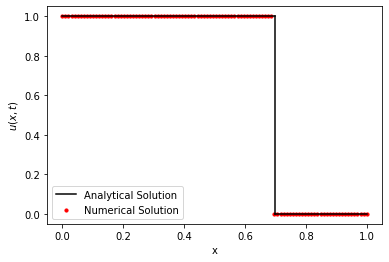

In [149]:
#%%timeit -n 10
# Ecuación de advección lineal

t = 0.2 # Tiempo real de simulación
n = 100 # Cantidad de puntos del mallado
maxim = 1
minim = 0
dx = (maxim - minim) / (n - 1)
a = 1.0
courant = 1
dt = courant * dx / a
uL = 1.0; uR = 0.0
u = np.zeros(n)

def condicionesIniciales ():
    u[:int(n/2)] = uL
    u[int(n/2):] = uR
    #for i in range(len(u)):
     #   u[i] = np.sin(i * dx)
    
def evolucionFTBS ():
    uOld = np.copy(u)
    u[1 : n - 1] = uOld[1 : n - 1] - courant * (uOld[1 : n - 1] - uOld[0 : n - 2])
    u[0] = uL; u[n - 1] = uR
    
def evolucionLF ():
    uOld = np.copy(u)
    u[1 : n - 1] = 0.5 * (uOld[2 : n] + uOld[: n - 2]) - 0.5 * courant * (uOld[2 : n] - uOld[0 : n - 2])
    u[0] = uL; u[n - 1] = uR

def imprima ():
    x = np.linspace(minim, maxim, n) # Mallado unidimensional
    plt.scatter(x, u, s = 10, label = "Numerical Solution", c = "red")
    #plt.plot(x, u, label = "Numerical Solution", c = "red")
    plt.xlabel("x")
    plt.ylabel(r"$u\left(x,t\right)$")
    x_coordinates1 = [0, 0.7];    y_coordinates1 = [1, 1]
    x_coordinates2 = [0.7, 1];    y_coordinates2 = [0, 0]
    x_coordinates3 = [0.7, 0.7];    y_coordinates3 = [0, 1]
    plt.plot(x_coordinates1, y_coordinates1, c = "black")
    plt.plot(x_coordinates2, y_coordinates2, c = "black")
    plt.plot(x_coordinates3, y_coordinates3, c = "black", label = "Analytical Solution")
    plt.legend(loc = "best")
    plt.savefig("advectionAnaliticNumeric.pdf")
    plt.show()

def main ():
    condicionesIniciales()
    for i in range (int(t / dt)):
        #evolucionLF()
        evolucionFTBS()
    imprima()  


main()


## Ejercicios

1) Realice la solución numérica de la ecuación de advección lineal utilizando los esquemas FTFS y FTCS. ¿Qué sucede con cada una de las anteriores implementaciones?. 

2) Solucione la ecuación de advección no lineal 

$$\frac{\partial u}{\partial t}+u\left(x,t\right)\frac{\partial u}{\partial x}=0,$$
 para $-\infty  < x < \infty$ y $t > 0$.
 
¿Qué diferencias encuentra con respecto a la solución de la ecuación lineal?.


3) Solucione numéricamente la ecuación de advección lineal en 2D a través de los métodos de FTBS y LF tanto para un perfíl sinudal como para un perfíl discontinuo.


4) Solucione numéricamente la ecuación de advección no lineal en 2D a través de los métodos de FTBS y LF tanto para un perfíl sinudal como para un perfíl discontinuo.

# Sesión 3: Estabilidad y criterio de von Neumann

En este método estamos interesados el crecimiento de un modo de Fourier en nuestra discretización.

Consideremos de nuevo la discretización de la ecuación de advección,

$$u_{i}^{n+1}=u_{i}^{n}-a\frac{\Delta t}{\Delta x}\left(u_{i}^{n}-u_{i-1}^{n}\right),$$

y hagamos el modo de Fourier de la siguiente manera

$$u_i^n = A^nexp\left(ji\theta\right),$$

en donde $j^2 = -1$ y $\theta$ representa por supuesto una fase.

Puesto que estamos evaluando el crecimiento de un modo, esperamos que el mismo no aumente en el tiempo, es decir $$|\frac{A^{n+1}}{A^{n}}| \leq 1.$$

Nótese que escogemos el coeficiente $A$ porque en el mismo está reflejado la transformación en la parte temporal, mientras que en la función exponencial está representada la transformación de la parte espacial de nuestra aproximación numérica.

Calculemos ahora el modo de Fourier para nuestro esquema numérico, es decir,

$$\begin{align*}
A^{n+1}e^{ji\theta} & =A^{n}e^{ji\theta}-a\frac{\Delta t}{\Delta x}\left(A^{n}e^{ji\theta}-A^{n}e^{j\left(i-1\right)\theta}\right)\\
 & =A^{n}e^{ji\theta}\left(1-a\frac{\Delta t}{\Delta x}\left(1-e^{-j\theta}\right)\right)\\
\end{align*}$$.

Tenemos entonces a partir de la fórmula de Euler que 

$$\begin{align*}
\left|\frac{A^{n+1}}{A^{n}}\right| & =Re\left(1-a\frac{\Delta t}{\Delta x}\left(1-\left(cos\theta-jsin\theta\right)\right)\right)\\
 & =1-a\frac{\Delta t}{\Delta x}\left(sin\theta+cos\theta-cos\theta\right)\\
 & =1-a\frac{\Delta t}{\Delta x}\left(sin\theta\right).
\end{align*}$$

Sabemos que $0 \leq |sin\left(\theta\right)| \leq 1$, con lo cuál necesitemos para garantizar la estabilidad que 

$$a\frac{\Delta t}{\Delta x}\leq 1.$$


A la cantidad $C = a\frac{\Delta t}{\Delta x}$ se le conoce como el número de Courant.

## Dominio de dependencia

El dominio numérico de dependencia muestra los puntos que pueden influenciar el valor $u_i^{n+1}$ usando el método de discretización.

Dominio numérico sobre los puntos del esquema pero el dominio físico está sobre las lineas características.

Condición necesaria pero no suficiente para garantizar estabilidad.

## Esquemas implícitos

Consideremos ahora el siguiente esquema numérico para la ecuación de advección lineal

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}+a\frac{u_{i}^{n+1}-u_{i-1}^{n+1}}{\Delta x}=0.$$

Podemos notar que la discretización espacial la hemos llevado a cabo para el tiempo $t^{n+1}$. Este tipo de esquemas los llamamos esquemas implícitos ya que la evolución temporal en el punto $x_i$ depende no sólo del punto $x_i$ en el tiempo anterior sino que además depende de algunos puntos en el tiempo $t^{n+1}$. En este caso en particular esa dependencia en en $x_i$ y en $x_{i-1}$, sin embargo, si hubiesemos hecho una discretización a segundo orden en el espacio, la dependencia sería sobre $u_{i+1}^{n+1}$ y $u_{i+1}^{n-1}$.  

Teniendo en cuenta que estamos interesados en conocer $u_{i}^{n+1}$, se tiene entonces que

$$u_{i}^{n+1}\left(1+C\right)-u_{i-1}^{n+1}C=u_{i}^{n}.$$

Nótese que de este esquema sólo se conoce la parte derecha de la ecuación, es decir, la información en $u_i^n$. Para ver con mayor facilidad lo que está pasando en el esquema anterior, tomemos por separado las anteriores ecuaciones (recuerde que el esquema anterior es un sistema de ecuaciones algebraicas y no una PDE), entonces

$$i = 0 \; \rightarrow \;u_{0}^{n+1}\left(1+C\right)-u_{N-1}^{n+1}C  = u_{0}^{n},$$

$$i = 1 \; \rightarrow \;u_{1}^{n+1}\left(1+C\right)-u_{0}^{n+1}C  = u_{1}^{n},$$

$$i = 2 \; \rightarrow \;u_{2}^{n+1}\left(1+C\right)-u_{1}^{n+1}C  = u_{2}^{n},$$

$$\vdots$$

$$i = N-1 \; \rightarrow \;u_{N-1}^{n+1}\left(1+C\right)-u_{N-2}^{n+1}C  = u_{N-1}^{n}.$$

El siguiente sistema de ecuaciones se puede escribir matricialmente como

$$\left(\begin{array}{ccccc}
1+C &  &  &  & -C\\
-C & 1+C\\
 & -C & 1+C\\
 &  & \ddots & \ddots\\
 &  &  & -C & 1+C
\end{array}\right)\begin{pmatrix}u_{0}^{n+1}\\
u_{1}^{n+1}\\
u_{2}^{n+1}\\
\vdots\\
u_{N-1}^{n+1}
\end{pmatrix}=\begin{pmatrix}u_{0}^{n}\\
u_{1}^{n}\\
u_{2}^{n}\\
\vdots\\
u_{N-1}^{n}
\end{pmatrix},$$

cuya solución está dada entonces por

$$\begin{pmatrix}u_{0}^{n+1}\\
u_{1}^{n+1}\\
u_{2}^{n+1}\\
\vdots\\
u_{N-1}^{n+1}
\end{pmatrix}=\left(\begin{array}{ccccc}
1+C &  &  &  & -C\\
-C & 1+C\\
 & -C & 1+C\\
 &  & \ddots & \ddots\\
 &  &  & -C & 1+C
\end{array}\right)^{-1}\begin{pmatrix}u_{0}^{n}\\
u_{1}^{n}\\
u_{2}^{n}\\
\vdots\\
u_{N-1}^{n}
\end{pmatrix}.$$



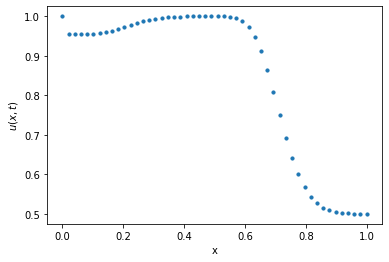

In [4]:
#%%timeit -n 10
from numpy.linalg import inv
t = 0.22 # Tiempo real de simulación
N = 50
dx = 1 / (N - 1)
a = 1.0
courant = 0.1
dt = courant * dx / a
uL = 1.0; uR = 0.5
u0 = np.zeros(N)
uSol = np.zeros(N)
mInv = np.zeros((N, N))
 
def matrix ():
    global mInv   
    m = np.zeros((N, N))   
    for i in range (N):
        for j in range (N):
            if i == j:
                m[i,j] = 1 + courant
            elif i == j + 1:
                m[i, j] = -courant            
    m[0, N - 1] = -courant
    mInv = np.copy(inv(m))
    
def condicionesIniciales():
    global u0   
    u0[ : int(0.5 * N)] = uL
    u0[int(0.5 * N) : ] = uR
    
def condicionesFrontera():
    global uSol
    uSol[0] = uL
    uSol[N - 1] = uR

def evolucione ():
    global u0, uSol, mInv
    uSol = np.dot(mInv, u0)
    u0 = uSol

def imprima ():
    global uSol
    x = np.linspace(0, 1, N) # Mallado unidimensional
    plt.scatter(x, uSol, s = 10)
    plt.xlabel("x")
    plt.ylabel(r"$u\left(x,t\right)$")
    plt.show()

def main ():      
    matrix()
    condicionesIniciales()
    for i in range (int(t / dt)):
        evolucione()
        condicionesFrontera()
    imprima()    

main()

## Ejercicios 

1) A través del método de von Neumann determine un criterio de estabilidad para la ecuación lineal de advección discretizada con los esquemas numéricos FTFS y FTCS.

2) A través del método de von Neumann determine uel criterio de estabilidad para la ecuación lineal de advección discretizada con los esquemas numéricos FTBS y FTCS implícitamente.

3) Realice una implementación numérica del esquema implícito FTSC para la ecuación de advección lineal.



## Sesión 4: Acerca de los esquemas conservativos

Consideremos ahora la ecuación no viscosa de Burgers en 1D

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0,$$

y una discretización explícita de la misma tipo FTBS dada por

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}+u_i^{n}\frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x}=0,$$

con las condiciones de frontera y condiciones iniciales definidas anteriormente.



Nótese que esta implementación nos lleva a algo que definitivamente no esperamos ya que el método no es convergente para soluciones discontinuas.


Un sistema conservativo es aquel que puede escribirse de la forma 

$$\frac{\partial u}{\partial x} + \frac{\partial}{\partial x} f\left(u\right) = 0,$$

en donde $f\left(u\right)$ hace referencia al flujo de la cantidad $u$.

El primer ejemplo que tenemos para este tipo de sistemas es la ecuación de advección lineal en donde $ f\left(u\right) = au$.

En el caso de la ecuación no viscosa de Burgers se tiene que $f\left(u\right) = \frac{1}{2}u^2$.

El plantear una ecuación de este tipo (conservativo), nos lleva a plantear esquemas de la siguienta manera (FTBS)

$$\frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} = - \frac{1}{\Delta x}\left(f_{i}^{n} - f_{i - 1}^{n}\right)$$.




Sin embargo podemos ir más allá y considerar esquemas de mayor oden, por ejemplo el esquema de Lax-Friedrichs (ya lo vimos anteriormente), el esquema de Lax-Wendroff (Segundo orden) y el esquema predictor-corrector (multipaso como Runge Kutta) de MacComack.

Lax-Friedrichs

$$u_i^{n+1} = \frac{1}{2}\left(u_{i+1}^{n} + u_{i-1}^{n}\right) - \frac{\Delta t}{2 \Delta x}\left[\frac{1}{2}\left(u_{i+i}^n\right)^{2} - \frac{1}{2}\left(u_{i-i}^n\right)^{2}\right].$$



Lax-Wendroff

$$u_{i}^{n+1} = u_{i+1}^{n} - \frac{\Delta t}{2 \Delta x}\left(f_{i+1} - f_{i-1}\right) + \frac{\Delta t^2}{2 \Delta x^2}\left[A_{i+1/2}\left(f_{i+1} - f_{i}\right) - A_{i-1/2}\left(f_{i} - f_{i - 1}\right)\right],$$

en donde $A = \frac{\partial f\left(u\right) }{\partial u}$ es la matríz Jacobiana.


MacComack

$$u_i^{*} = u_{i}^{n} - \frac{\Delta t}{\Delta x}\left(f_{i+1} - f_{i}\right)$$

$$u_{i}^{n+1} = \frac{1}{2}\left(u_{i}^{n} + u_{i}^{*}\right) - \frac{\Delta x}{2\Delta t}\left(f_{i}^{*} - f_{i-1}^{*}\right).$$




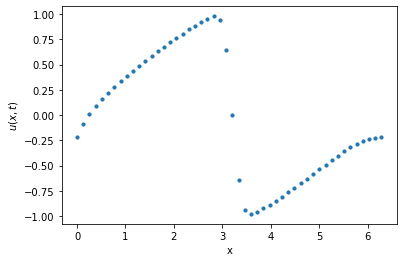

In [6]:
#%%timeit -n 10
# Ecuación de Burgers no viscosa

t = 1.5 # Tiempo real de simulación
n = 50 # Cantidad de puntos del mallado
maxim = 2 * np.pi
minim = 0
dx = (maxim - minim) / n 
dt = dx 
u = np.zeros(n)

def condicionesIniciales ():
    for i in range(n):
        u[i] = np.sin(i * dx)
    

def evolucionFTBS ():
    uOld = np.copy(u)
    u[1:] = uOld[1:] - (dt / dx) * uOld[1:] * (uOld[1:] - uOld[:n - 1])
    u[0] = u[n - 1]

def evolucionCons ():
    uOld = np.copy(u)
    f = np.arange(n)
    f = 0.5 * np.copy(uOld) * np.copy(uOld) 
    u[1:] = uOld[1:] - (dt / dx) * (f[1:] - f[:n - 1])
    u[0] = u[n - 1]
    
def evolucionLF ():
    uOld = np.copy(u)
    f = np.arange(n)
    f = 0.5 * np.copy(uOld) * np.copy(uOld)
    u[1 : n - 1] = 0.5 * (uOld[2 : n] + uOld[: n - 2]) - 0.5 * (dt / dx) * (f[2 : n] - f[: n - 2])
    u[n - 1] = 0.5 * (uOld[0] + uOld[n - 2]) - 0.5 * (dt / dx) * (f[0] - f[n - 2])
    u[0] = u[n - 1]

def imprima ():
    x = np.linspace(minim, maxim, n) # Mallado unidimensional
    plt.scatter(x, u, s = 10)
    plt.xlabel("x")
    plt.ylabel(r"$u\left(x,t\right)$")
    plt.show()

def main ():
    condicionesIniciales()
    for i in range (int(t / dt)):
        evolucionLF()
        #evolucionFTBS()
        #evolucionCons()
       # condicionesFrontera()
    imprima()    

main()

## Solución en 2D para la ecuación de advección lineal

Nuestro problema ahora está dado por

$$\partial_t \phi + a\partial_x \phi + b \partial_y \phi = 0,$$

en donde $\phi = \phi\left(t, x, y\right)$ y $a$, $b$ son las velocidades constantes de advección en la dirección $x$ y $y$ respectivamente.

La discretización de la anterior ecuación a través del método FTBS está dada por

$$\frac{\phi^{n+1}_{i,j} + \phi^{n}_{i,j}}{\Delta t} + a\left(\frac{\phi^{n}_{i,j} - \phi^{n}_{i-1,j}}{\Delta x}\right) + b\left(\frac{\phi^{n}_{i,j} - \phi^{n}_{i,j-1}}{\Delta y}\right) = 0.$$

Supongamos ahora que la velocidad de advección en ambas direcciones espaciales es la misma, es decir, $a = b$, además tomemos el mallado espacial igual, con lo que tenemos $\delta = \Delta x = \Delta y$. A partir de esas consideraciones tenemos entonces que

$$\phi^{n+1}_{i,j} = \phi^{n}_{i,j}\left(1-2C\right) + C\left(\phi^{n}_{i-1,j} + \phi^{n}_{i,j-1}\right),$$ 

en donde $C = a\frac{\Delta t}{\delta}$. 


Pendiente la implementación

In [12]:
#%%timeit -n 10
# Ecuación de advección lineal

t = 0.2 # Tiempo real de simulación
n = 9 # Cantidad de puntos del mallado
maxim = 1
minim = 0
dx = (maxim - minim) / (n - 1)
dy = dx
a = 1.0
C = 0.1 # Número de Courant
dt = C * dx / a
uL = 1.0; uR = 0.0
u = np.zeros((n, n)) # matríz solución


def condicionesIniciales ():
    u[int(n / 3): int(2 * n / 3) , int(n / 3): int(2 * n / 3)] = 1;   
    
def condicionesFrontera():
    u[:,0] = 0;    u[:,n - 1] = 0;
    u[0, :] = 0;    u[n - 1, :] = 0;

def evolucionFTBS ():
    uOld = np.copy(u)
    u[1 : n - 1 , 1 : n - 1] = uOld[1 : n - 1 , 1 : n - 1] - 2 * C * uOld[1 : n - 1 , 1 : n - 1] + C * (uOld[ : n - 2 , 1 : n - 1] + uOld[1 : n - 1 , : n - 2]) 
'''   
def evolucionLF ():
    uOld = np.copy(u)
    u[1 : n - 1] = 0.5 * (uOld[2 : n] + uOld[: n - 2]) - 0.5 * courant * (uOld[2 : n] - uOld[0 : n - 2])
    u[0] = uL; u[n - 1] = uR

def imprima ():
    x = np.linspace(minim, maxim, n) # Mallado unidimensional
    plt.scatter(x, u, s = 10, label = "Numerical Solution", c = "red")
    #plt.plot(x, u, label = "Numerical Solution", c = "red")
    plt.xlabel("x")
    plt.ylabel(r"$u\left(x,t\right)$")
    x_coordinates1 = [0, 0.7];    y_coordinates1 = [1, 1]
    x_coordinates2 = [0.7, 1];    y_coordinates2 = [0, 0]
    x_coordinates3 = [0.7, 0.7];    y_coordinates3 = [0, 1]
    plt.plot(x_coordinates1, y_coordinates1, c = "black")
    plt.plot(x_coordinates2, y_coordinates2, c = "black")
    plt.plot(x_coordinates3, y_coordinates3, c = "black", label = "Analytical Solution")
    plt.legend(loc = "best")
    plt.savefig("advectionAnaliticNumeric.pdf")
    plt.show()
'''
def main ():
    condicionesIniciales()
    for i in range (int(t / dt)):
        evolucionFTBS()
        condicionesFrontera()
    #imprima()  


main()
u

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.0281475 , 0.08444249,
        0.13721905, 0.13985788, 0.09606983, 0.        ],
       [0.        , 0.        , 0.        , 0.08444249, 0.2462906 ,
        0.39142614, 0.38779775, 0.257217  , 0.        ],
       [0.        , 0.        , 0.        , 0.13721905, 0.39142614,
        0.61160334, 0.59271923, 0.38267729, 0.        ],
       [0.        , 0.        , 0.        , 0.13985788, 0.38779775,
        0.59271923, 0.55760701, 0.34669942, 0.        ],
       [0.        , 0.        , 0.        , 0.09606983, 0.257217  ,
        0.38267729, 0.34669942, 0.20533557, 0.        ],


### Ejericicios

1) Considere la ecuación de Burgers no viscosa con un perfil inicial sinuidal y con condiciones de frontera periodicas. Aplique el esquema numérico no conservativo y un esquema numérico conservativo (FTBS) para solucionar tal ecuación en 2D. 

2) Solucione numéricamente la ecuación de Burgers no viscosa en 1D a través de los métodos de LF, LW. MacComack y compárelos junto con los esquemas no conservativo y conservativo FTBS tanto para un perfil sinudal como para un perfil discontinuo.

3) Solucione numéricamente la ecuación de Burgers no viscosa en 2D a través de los métodos de LF, LW. MacComack y compárelos junto con los esquemas no conservativo y conservativo FTBS tanto para un perfil sinuidal como para un perfíl discontinuo.

# Sesión 5: Ecuaciones de tipo elíptico y de tipo parabólico


Consideremos ahora la ecuación de Burgers a full, es decir,  $\mu \neq 0$, con lo cuál

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \mu \frac{\partial^2 u}{\partial x²},$$

en donde $\mu$ es el término de viscosidad. La ecuación de Burger's es una forma especial de la ecuación de momento para un fluido incompresible e irrotacional en el cuál se desprecian los gradientes de presión.

¿Cómo tratar esta ecuación?. Tenga en cuenta que ahora tiene que considerar, además de una derivada temporal y una derivada que debe de ser tratada (al menos para problemas discontinuos) de forma conservativa, una derivada de segundo orden.

Solución, tome ahora la aproximación

$$\frac{\partial^2 \phi}{\partial z²} = \frac{\phi_{i+1} - 2\phi_{i} + \phi_{i-1}}{\Delta z^2} + \mathcal{O}\left(\Delta z^2\right).$$

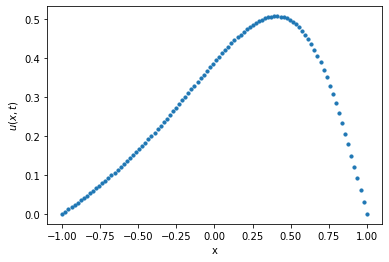

In [143]:
#%%timeit -n 10
# Ecuación de Burgers viscosa
### Arreglar esto
t = 1 # Tiempo real de simulación
n = 100 # Cantidad de puntos del mallado
maxim = 1
minim = -1
dx = (maxim - minim) / n 
mu = 0.1
dt = 0.5 * mu * dx
u = np.zeros(n)
uIn = 1

def condicionesIniciales ():
    u[int(1 / 3 * n) : int(2 / 3 * n)] = uIn

def evolucionC ():
    uOld = np.copy(u)
    f = np.arange(n)
    f = 0.5 * np.copy(uOld) * np.copy(uOld) 
    aux1 = dt / dx
    aux2 = mu * dt / (dx * dx)
    u[1 : n - 1] = uOld[1 : n - 1] - aux1 * (f[1 : n - 1] - f[0 : n - 2]) + aux2 * (uOld[2 : n] - 2 * uOld[1 : n - 1] + uOld[: n - 2])
    u[0]= 0; u[n - 1]= 0
    
def evolucionNC ():
    uOld = np.copy(u)
    aux1 = dt / dx
    aux2 = mu * dt / (dx * dx)
    u[1 : n - 1] = uOld[1 : n - 1] - aux1 * uOld[1 : n - 1] * (uOld[1 : n - 1] - uOld[0 : n - 2]) + aux2 * (uOld[2 : n] - 2 * uOld[1 : n - 1] + uOld[: n - 2])
    u[0] = 0; u[n - 1] = 0
    
def imprima ():
    x = np.linspace(minim, maxim, n) # Mallado unidimensional
    plt.scatter(x, u, s = 10)
    plt.xlabel("x")
    plt.ylabel(r"$u\left(x,t\right)$")
    plt.show()

def main ():
    condicionesIniciales()
    for i in range (int(t / dt)):
        #evolucionC()
        evolucionNC()
    imprima()    
main()


## Ecuación de calor unidimensional

Consideremos la ecuación de calor 

$$\frac{\partial u}{\partial t} -k\frac{\partial^2 u}{\partial x^2} = 0,$$

y supongamos que queremos solucionar el problema de una varilla de longitud $L$ con un mapa inicial de temperatura la cuál se enfría a través de sus extremos. En términos matemáticos

IC

$$u\left(x,t=0\right) = u_0\left(x\right),$$

BC

$$u\left(x=0,t\right) = u\left(x=L,t\right) = T_-.$$

### Ejercicios:

1) El método explícito de Dufort-Frankel considera diferencias centradas de segundo orden para todos los términos de la PDE. Escriba el esquema numérico de Dufort-Frankel, encuentre un criterio de estabilidad para el mismo y realize una implementación computacional para la ecuación unidimensional de Burgers.

2) Solucione numéricamente la ecuación de Burgers en 2D a través de los métodos de LF, LW. MacComack para un perfil sinudal como para un perfil discontinuo. Haga un estudio para distintos valores del coeficiente de viscosidad. ¿Que puede concluir de su experimento computacional?.

3) Solucione a través del método de separación de variables la ecuación unidimenional de calor.

4) Utilice discretizaciones centradas y hacia adelante para el término temporal en la ecuación de calor. Determine a través del análisis de von Neumann la estabilidad de ambos esquemas. Si alguno de ellos es estable, impleméntelo.

5) Suponga ahora que su problema es estudiar una placa rectangular la cuál tiene un perfil de temperatura inicial y se enfría a través de sus fronteras. Utilizando el esquema numérico estable encontrado con anterioridad solucione este problema. 